d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.1\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.2\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.3\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.4\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.5\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.6\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.7\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.8\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.9\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-1\run


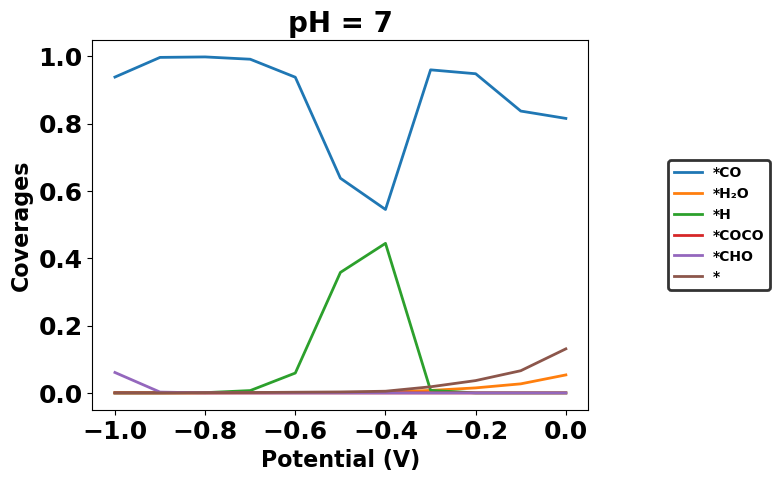

d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.1\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.2\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.3\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.4\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.5\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.6\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.7\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.8\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.9\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-1\run


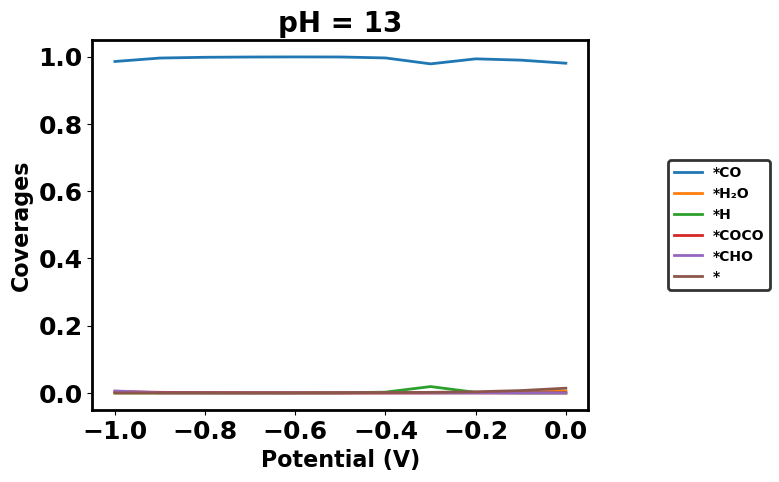

In [1]:
from solver_settings import V_list,pH_list
import os
import matplotlib.pyplot as plt
base_directory = os.getcwd()
for pH in pH_list:
    def get_val(V,path):
        path = path + "\\V_"+str(V) 
        l = os.listdir(path)
        for i in l:
            if i.startswith("run"):
                seq_name = i
        path = path + "\\"+ seq_name
        print(path)
        l = os.listdir(path)
        seq_name1 = 'range'
        path = path + "\\"+ seq_name1
        
        cov_file = open(path+"\\"+"coverage.dat")
        
        cov_val = []
        
        cov_lines = cov_file.readlines()
        
        adsorbate_keys = cov_lines[0].strip().split()
        
        cov_dat_dict = {}
        
        for key in adsorbate_keys:
            cov_dat_dict[key] = []
        
        for line in cov_lines[1:]:
            vals = line.strip().split()
            vals = list(map(lambda x : float(x), vals))
            c=0
            for key in adsorbate_keys:
                cov_dat_dict[key].append(vals[c])
                c+=1
                
        cov_file.close()
        return cov_dat_dict
    
    path1="pH_" + str(pH)
    path=os.path.join(base_directory,path1)
    covs = get_val(V_list[0],path)
    covs_relevant ={}

    for key in covs.keys():
        if '*' in key:
            covs_relevant[key] = covs[key]

    covs_all_dat = {}

    for V in V_list:
        covs_all_dat[V]= {}
        val = get_val(V,path)
        for key in covs_relevant.keys():
                covs_all_dat[V][key] = val[key][-1]

    normal = "0123456789+-="
    super_s = "⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼"
    super_script = str.maketrans(normal,super_s)


    def make_trans(x):
        normal = "0123456789"
        sub_s = "₀₁₂₃₄₅₆₇₈₉"
        res = x.maketrans(''.join(normal), ''.join(sub_s))
        res = x.translate(res)
        if '*' in res:
            res = res.rstrip('*')
            res = '*'+res
        return res

    from matplotlib import rc, rcParams
    temp ={}
    for key in covs_relevant.keys():
        temp[key] = []
        for V in V_list:
            val = covs_all_dat[V][key]
            temp[key].append(val)
            
    final_vals = {}
    for key in temp.keys():
        val = temp[key]
        if max(val) <= 1 and min(val) >= 1e-20:
            final_vals[key] = temp[key]
            #val[:] = [x / Catalyst_Loading for x in val]
            #plt.plot(T_list, val,c=colour_dict[key], marker=markers_dict[key], label= make_trans(key), linewidth=2)
            plt.plot(V_list, val, label= make_trans(key), linewidth=2)

    #         plt.title(key)
        plt.xlabel('Potential (V)', fontsize = 16, fontweight='bold')
        plt.ylabel('Coverages', fontsize = 16,  fontweight='bold')
    legend_properties = {'weight':'bold'}
    leg=plt.legend(bbox_to_anchor=(1.38,0.5),loc='right', prop=legend_properties,fontsize = 18)
    # bbox_to_anchor=(1.38,1)
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(2.0)
    plt.xticks(fontweight='bold',fontsize= '18')
    plt.yticks(fontweight='bold',fontsize= '18')
    plt.title('pH = '+str(pH), fontsize = 20, fontweight='bold')
    rc('axes', linewidth=2)
    plt.show()

In [2]:
# Constants
import numpy as np
kb = 8.617e-5  # Boltzmann constant (eV/K)
nu = 6.21e+12  # KbT/h (s-1)
T = 298.15     # temperature (K)
pH = 7         # solution pH
V = np.arange(-1, 0.1, 0.1)  # Potential range from -1 to 0 with step of 0.1
q = 1.6e-19    # Elementary charge (C)
A = 7.06e-6    # Area (m^2)
k = 6.026e23   # Avogadro's constant
delg4actf = -0.1667 * (V - 0.059 * pH) + 0.4278
delg5actf = -0.0804 * (V - 0.059 * pH) + 0.6001

k4f = nu * np.exp(-delg4actf / (kb * T))
k5f = nu * np.exp(-delg5actf / (kb * T))

# Define other constants
sco = 1
scho = 1
sh = 1
scoco = 2

d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_0.0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_0.0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.1\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.2\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.3\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.4\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.5\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.6\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.7\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.8\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-0.9\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_7\V_-1.0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_0.0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_0.0\run
d:\projects\mkm_shell\Codes\USS_CV\Steady State\pH_13\V_-0.1\run
d:\projects\mkm_shell\Codes\USS_CV\Steady

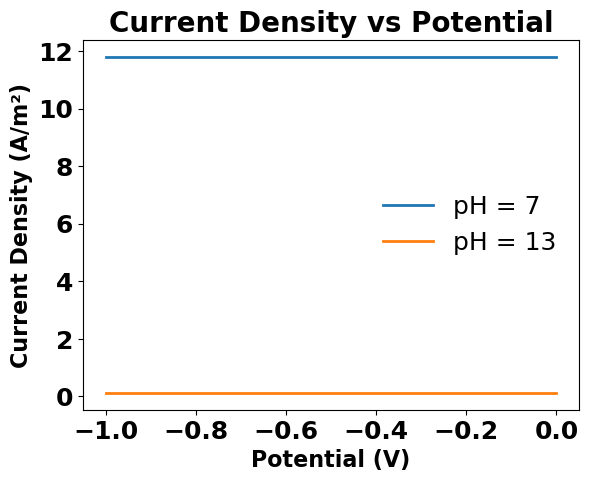

In [17]:
from solver_settings import V_list, pH_list
import os
import matplotlib.pyplot as plt
import numpy as np

base_directory = os.getcwd()

# Define constants (Ensure these are available from your model or code)
kb = 8.617e-5  # Boltzmann constant (eV/K)
nu = 6.21e+12  # KbT/h (s-1)
T = 298.15     # temperature (K)
q = 1.6e-19    # Elementary charge (C)
A = 7.06e-6    # Area (m^2)
k = 6.026e23   # Avogadro's constant

V_list = np.array(V_list)
pH_list = np.array(pH_list)



def get_val(V, path):
    path = os.path.join(path, "V_" + str(V))
    l = os.listdir(path)
    for i in l:
        if i.startswith("run"):
            seq_name = i
    path = os.path.join(path, seq_name)
    print(path)
    l = os.listdir(path)
    seq_name1 = 'range'
    path = os.path.join(path, seq_name1)
    
    cov_file = open(os.path.join(path, "coverage.dat"))
    cov_val = []
    cov_lines = cov_file.readlines()
    adsorbate_keys = cov_lines[0].strip().split()
    cov_dat_dict = {key: [] for key in adsorbate_keys}
    
    for line in cov_lines[1:]:
        vals = line.strip().split()
        vals = list(map(float, vals))
        for c, key in enumerate(adsorbate_keys):
            cov_dat_dict[key].append(vals[c])
                
    cov_file.close()
    return cov_dat_dict

# Main code for each pH
for pH in pH_list:
    path1 = "pH_" + str(pH)
    path = os.path.join(base_directory, path1)
    
    # Extract the coverage data for the first potential
    covs = get_val(V_list[0], path)
    covs_relevant = {key: covs[key] for key in covs.keys() if '*' in key}
    
    covs_all_dat = {}
    
    # Extract coverage data for all potentials
    for V in V_list:
        covs_all_dat[V] = {}
        val = get_val(V, path)
        for key in covs_relevant.keys():
            covs_all_dat[V][key] = val[key][-1]
    
    # Define the variables required for the current density formula
    # Extracting the relevant coverage values from covs_all_dat for each species (e.g., H*, CO*, etc.)
    thetah = covs_all_dat[V]['H*']  # H* coverage
    thetacoco = covs_all_dat[V]['COCO*']  # COCO* coverage
    thetaco = covs_all_dat[V]['CO*']   # CO* coverage
    thetacho = covs_all_dat[V]['CHO*']  # CHO* coverage

    # Now perform element-wise operations
    delg4actf = -0.1667 * (V - 0.059 * pH) + 0.4278
    delg5actf = -0.0804 * (V - 0.059 * pH) + 0.6001

    k4f = nu * np.exp(-delg4actf / (kb * T))
    k5f = nu * np.exp(-delg5actf / (kb * T))
    
    # Calculate current density (j) for each potential
    j_vals = []
    for V in V_list:
        j = 8 * 1.6e-19 * 7.06e-6 * 6.026e23 * (
            ((k5f * (thetah * thetacoco)) / (1 * 2)) +  # Using sh=1 and scoco=2
            ((k4f * (thetaco * thetacho)) / (1 * 1))   # Using sco=1 and scho=1
        )
        j_vals.append(j)

    # Plot current density vs potential
    plt.plot(V_list, j_vals, label=f'pH = {pH}', linewidth=2)

# Labeling and formatting plot
plt.xlabel('Potential (V)', fontsize=16, fontweight='bold')
plt.ylabel('Current Density (A/m²)', fontsize=16, fontweight='bold')
plt.legend(fontsize=18, loc='best', frameon=False)
plt.title('Current Density vs Potential', fontsize=20, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=18)
plt.yticks(fontweight='bold', fontsize=18)
plt.show()